In [2]:
import random

# gene
def generate_01():
    return random.randint(0, 1)

# evaluate
def compute_fitness(vector):
    return sum(gen for gen in vector)

def create_vector():
    return [generate_01() for _ in range(n)]

def exchange(vector1, vector2, n, rate=0.9):
    vector1_new = vector1.copy()
    vector2_new = vector2.copy()
    
    for i in range(n):
        if random.random() < rate:
            vector1_new[i] = vector2[i]
            vector2_new[i] = vector1[i]            
    
    return vector1_new, vector2_new

# population is sorted according to fitness
def select_better_vector(sorted_vectors):    
    index1 = random.randint(0, m-1)    
    index2 = random.randint(0, m-1)
    
    while index2 == index1:
        index2 = random.randint(0, m-1)
       
    
    vector = sorted_vectors[index1]
    if index2 > index1:
        vector = sorted_vectors[index2]
    
    return vector 

In [3]:
n = 20                 # size of individual (chromosome)
m = 40                 # size of population
n_generations = 30     # number of generations

# để vẽ biểu đồ quá trình tối ưu
fitnesses = []


# create population
vectors = [create_vector() for _ in range(m)]

# loops
for i in range(n_generations):
    # step 1: sort population
    sorted_vectors = sorted(vectors, key=compute_fitness)
        
    if i%1 == 0:
        fitnesses.append(compute_fitness(sorted_vectors[m-1]))
        print("BEST:", compute_fitness(sorted_vectors[m-1]))      
    
    new_vectors = []
    while len(new_vectors) < m:
        # step2: selection
        vector1 = select_better_vector(sorted_vectors)
        vector2 = select_better_vector(sorted_vectors) # duplication
        
        # step3: exchange
        vector1, vector2 = exchange(vector1, vector2, n)
                
        new_vectors.append(vector1)
        new_vectors.append(vector2) 
        
    # update
    vectors = new_vectors

BEST: 14
BEST: 15
BEST: 15
BEST: 15
BEST: 16
BEST: 17
BEST: 19
BEST: 19
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20
BEST: 20


In [4]:
sorted_vectors = sorted(vectors, key=compute_fitness)
vector_best = sorted_vectors[-1]
print(vector_best)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


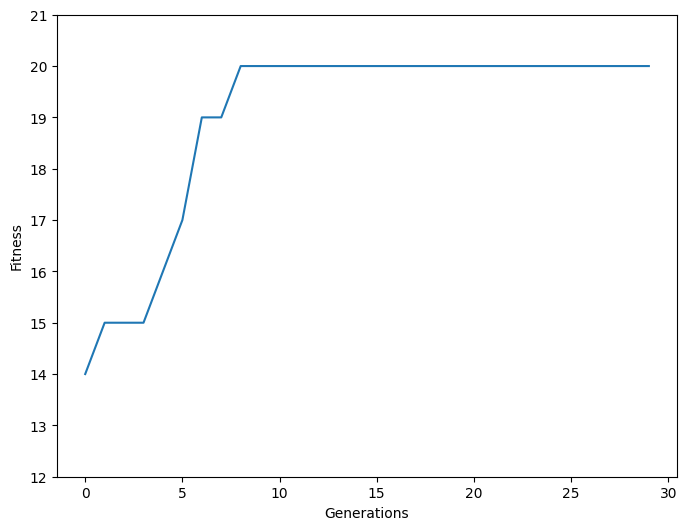

In [5]:
import matplotlib.pyplot as plt
#%matplotlib qt

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_ylim((12, 21))

plt.plot(fitnesses)
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()